# Test Normal model implementation

In [65]:
import numpy as np
import pandas as pd
from option_models import bsm
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [66]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: 
 [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy         mc           gap
strike                                               
80      21.185930  21.185930  21.355572 -8.526513e-14
81      20.348379  20.348379  20.610888 -4.263256e-14
82      19.526455  19.526455  19.335590 -4.263256e-14
83      18.720866  18.720866  18.817734 -4.263256e-14
84      17.932279  17.932279  18.125651 -5.684342e-14
85      17.161318  17.161318  17.339368 -5.684342e-14
86      16.408558  16.408558  15.872297 -5.684342e-14
87      15.674521  15.674521  15.818747 -5.684342e-14
88      14.959672  14.959672  15.061964 -6.394885e-14
89      14.264418  14.264418  14.674999 -5.684342e-14
90      13.589108  13.589108  13.780608 -6.394885e-14
91      12.934027  12.934027  12.822011 -8.526513e-14
92      12.299398  12.299398  12.363886 -5.684342e-14
93      11.685384  11.685384  11.581939 -7.815970e-14
94      11.0920

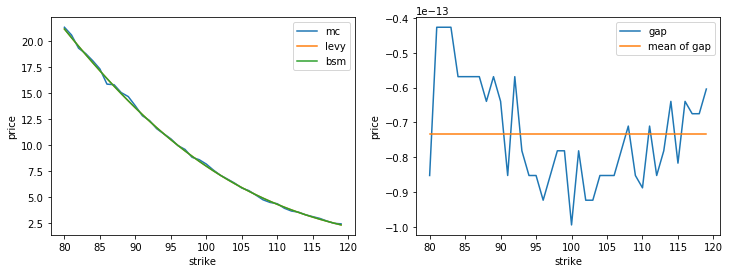

In [67]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m: \n',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
mcList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(bsm.bsm_price(strike, spot[0], vol[0], texp, intr, divr[0], cp_sign=1))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList,'bsm':bsmList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax1.plot(strikeRange,bsmList,label='bsm')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
             levy         mc       gap
strike                                
80      21.185787  21.014707  0.171079
81      20.348226  20.411363 -0.063137
82      19.526291  19.665222 -0.138931
83      18.720690  18.684475  0.036214
84      17.932092  18.241011 -0.308919
85      17.161121  17.064795  0.096326
86      16.408350  16.529110 -0.120760
87      15.674303  15.808244 -0.133941
88      14.959444  14.562793  0.396652
89      14.264181  14.546229 -0.282048
90      13.588862  13.631000 -0.042138
91      12.933772  12.662839  0.270934
92      12.299136  12.229757  0.069379
93      11.685115  11.781550 -0.096435
94      11.091810  10.958747  0.133062
95      10.519260  10.346680  0.172581
96       9.967449  10.120459 -0.153010
97       9.436299   9.563597 -0.127298
98       8.925682   9.068517 -0.142

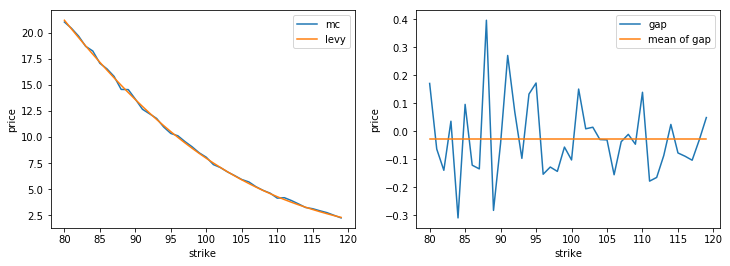

In [69]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m: \n',cor_m)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

In [70]:
# A test set for spread option

spot = np.array([100, 96])
vol = np.array([0.2, 0.1])
weights = np.array([1, -1])
divr = np.array([1, 1])*0.05
intr = 0.1
cor_m = np.array([[1, 0.5], [0.5, 1]])
texp = 1

price = 8.5132252

weights: [ 1 -1]
cor_m: [[ 1.   0.5]
 [ 0.5  1. ]]
            levy        mc       gap
strike                              
1       3.335758  8.415063 -5.079305
2       2.949330  7.821644 -4.872314
3       2.672021  7.346326 -4.674306
4       2.456446  6.838671 -4.382224
5       2.281084  6.307450 -4.026366
6       2.134098  5.955941 -3.821842
7       2.008224  5.635982 -3.627758
8       1.898659  5.127037 -3.228377
9       1.802059  4.917774 -3.115715
10      1.715997  4.452122 -2.736126
11      1.638658  4.118386 -2.479728
12      1.568648  3.915667 -2.347019
13      1.504875  3.661245 -2.156370
14      1.446465  3.344394 -1.897929
15      1.392712  3.059942 -1.667230
16      1.343033  2.826729 -1.483696
17      1.296948  2.701456 -1.404508
18      1.254050  2.453382 -1.199332
19      1.213996  2.180891 -0.966894
20      1.176493  2.126573 -0.950080
21      1.141290  1.865587 -0.724297
22      1.108166  1.754042 -0.645875
23      1.076934  1.579967 -0.503033
24      1.047425  1.4381

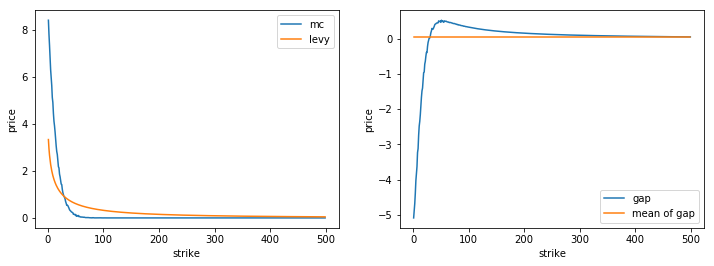

In [71]:
# MC price based on normal model
# make sure that the prices are similar\

print('weights:',weights);print('cor_m:',cor_m)

np.random.seed(123456)
strikeRange = np.arange(1,500,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()

#we can find if we price the spread option with levy model, the gap is very large when strike approaches 0

In [72]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
price = 28.0073695

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
             levy         mc       gap
strike                                
80      36.398241  35.457145  0.941096
81      35.921035  36.872435 -0.951400
82      35.450670  34.944262  0.506408
83      34.987055  35.166035 -0.178980
84      34.530098  35.374580 -0.844481
85      34.079709  33.311236  0.768473
86      33.635796  32.601357  1.034439
87      33.198270  32.595685  0.602585
88      32.767041  32.849454 -0.082413
89      32.342021  31.516131  0.825890
90      31.923122  32.036185 -0.113064
91      31.510255  31.535601 -0.025346
92      31.103336  31.041757  0.061579
93      30.702278  31.378308 -0.676030
94      30.306996  29.778685  0.528311
95      29.917406  31.196847 -1.279440
96      29.533426  29.969294 -0.435868
97      29.154973  30.638959 -1.483986
98      28.781965  28.936434 -0.154468
99      28.414323  27.722179  0.692143
100  

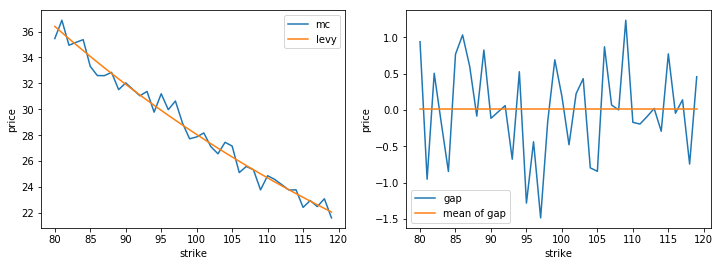

In [75]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m: \n',cor_m)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'mc':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()

#we can see the levy method much less volatile than bsm model when the vol gets higher